# Brown Scholars Internship 2019-2020 - Urban Wildlife in NYC

New York City is home to many diverse species of wildlife that arrived or existed long before humans settled here.
In October 2016, Mayor Bill de Blasio launched WildlifeNYC, a citywide education and awareness campaign teaching New Yorkers how to live safely and responsibly alongside wild animals including deer, raccoons, and coyotes.

Urban wildlife is any wild animal that lives in an urban environment, such as New York City. Urban wildlife includes birds, mammals, reptiles, fish and amphibians. Some urban wildlife is native, like eastern grey squirrels, while some are non-native, like mute swans. Domesticated and companion animals, like dogs, exotic pets, and farm animals are not considered urban wildlife. Domesticated but feral animals like pigeons and stray cats are also not considered urban wildlife.

Data source: https://data.cityofnewyork.us/Environment/Urban-Park-Ranger-Animal-Condition-Response/fuhs-xmg2

First we'll start by importing packages we'll use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

and then import the data. For now, the csv file should be in the same directory as the notebook. Notice that we are importing the date and time info as type 'datetime'

In [2]:
data = pd.read_csv('Urban_Park_Ranger_Animal_Condition_Response.csv',
                   parse_dates = ['Date and Time of initial call', 'Date and time of Ranger response'])

Note: if you want to export the data, use df.to_csv(filename), where df is the name of your dataframe and filename is the name of the file where you want to save the data. The csv file will get created in the same directory as the notebook.

#### Step 1: Viewing and inspecting the data

Now that the data is loaded, let's check it out. To learn more about what the data looks like we can try the following commands:
- data.head( ) - to look at the first 5 rows
- data.tail( ) - to look at the last 5 rows
- data.shape - to get the number of rows and columns
- data.info( ) - to get the names of the columns, how many non null pieces of data is in each column, and the type of data in each column
- data.nunique( ) - to get how many unique values are in each column
- data.max() - to get the highest value in each column
- data.min() to get the lowest value in each column
- data['col'].value_counts() - to get how many unique values are in a particular column

In [3]:
data.head()
data.tail()
data.shape
data.info()
data.nunique()
data.max() 
data.min()
data['Animal Monitored']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 22 columns):
Date and Time of initial call       982 non-null datetime64[ns]
Date and time of Ranger response    982 non-null datetime64[ns]
Borough                             982 non-null object
Property                            982 non-null object
Location                            918 non-null object
Species Description                 969 non-null object
Call Source                         982 non-null object
Species Status                      968 non-null object
Animal Condition                    758 non-null object
Duration of Response                982 non-null float64
Age                                 982 non-null object
Animal Class                        982 non-null object
311SR Number                        573 non-null object
Final Ranger Action                 982 non-null object
# of Animals                        974 non-null float64
PEP Response                        9

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7       True
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
952    False
953    False
954    False
955    False
956    False
957    False
958    False
959    False
960    False
961    False
962     True
963     True
964    False
965    False
966    False
967     True
968     True
969     True
970     True
971    False
972    False
973    False
974     True
975    False
976     True
977     True
978    False
979     True
980      NaN
981      NaN
Name: Animal Monitored, Length: 982, dtype: object

#### Step 2: Cleaning the data

By now, we should have a sense of which columns may have null values. It may be or not be ok for a column to have null values. One way to replace null values with some other value is using, use data.fillna(x) where x is the value we want instead of the null.

In addition, the data may not be in 'standard' form, that is for example, having the strings 'yes', 'YES', and 'Yes' all be values contained in the same column. To verify that the data in a column is in 'standard' form, we can use data['column_name'].unique(). For example, what happens when we try data['Species Description'].unique()? What happens when we try data['Species Status'].unique()? To replace values, we can use data['column name'].replace('yes','Yes') to replace all 'yes' values with 'Yes' values (for example).

In [4]:
data['Rehabilitator'].replace('Wildbird Fund', 'Wild bird Fund')

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
5                        NaN
6      Animal Medical Center
7                        NaN
8                        NaN
9                        NaN
10                       NaN
11                       NaN
12                       NaN
13                       NaN
14                       NaN
15                       NaN
16                       NaN
17                       NaN
18                       NaN
19            Wild Bird Fund
20            Wild bird Fund
21                       NaN
22                       NaN
23                       NaN
24                       NaN
25                       NaN
26                       NaN
27                       NaN
28                       NaN
29            Wild Bird Fund
               ...          
952                      NaN
953                      NaN
954                      NaN
955           

#### Step 3: Exploring the data

Once our data is in the shape that we need it to be, we can start exploring it. To learn more about what the data can tell us we'll try filtering and grouping it, also computating some basic statistics and making graphs. The decisions that we make when doing all this can be based on our knowledge of the topic, our curiosity to learn from the data, as well as informed by what we learn from the data (or all three!).

##### Filtering data

To filter data, the following commands are useful:

- data[col] - to work only with one column
- data[data[col] > 7] - to extract rows that meet a particular criteria
- data[(data[col] > 0.5) & (data[col] < 0.7)] - to extract rows that meet more than one criteria

In [5]:
data['Property'] 
data[data['Duration of Response'] > 7]
data[(data['Duration of Response'] > 0.5) & (data['Duration of Response'] < 0.7)]

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number


##### Grouping data

To group data, the following commands are useful:
- data[[col1, col2]] - to work with only some columns
- data.groupby(col) - To group the data based on the values in one column
- data.groupby([col1,col2]) - To group the data based on the values in more than one column
- If we want to find out how big each group is, we can use use .size() to count the number of rows in each group.

In [6]:
data[['Borough', 'Property']]
group = data.groupby('Borough') 
data.groupby(['Borough', 'Property'])
group.size()

Borough
Bronx             68
Brooklyn         218
Manhattan        475
Queens           137
Staten Island     84
dtype: int64

##### Basic statistics

To compute some basic statistics we can use:
- data.describe() - summary statistics for numerical columns
- data.mean() - mean of all columns
- data.median() - median of each column
- data.std() - standard deviation of each column
- data.corr() - to get the correlation between columns

In [7]:
data.describe()
data.mean()
data.median()
data.std()
data.corr()

,Duration of Response,# of Animals,Hours spent monitoring,ESU Response
Duration of Response,1.000000,0.027589,0.632575,0.046757
# of Animals,0.027589,1.000000,-0.025882,-0.009716
Hours spent monitoring,0.632575,-0.025882,1.000000,0.220775
ESU Response,0.046757,-0.009716,0.220775,1.000000


##### Making graphs

To visualize categorical data we can use:
- g = data['col'].value_counts()
- g.plot(x=g.index, y=g.values, kind = 'bar')or g.plot.pie(y='Borough')

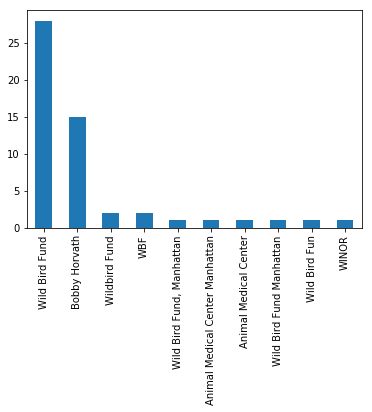

In [10]:
g = data['Rehabilitator'].value_counts()
g.plot(x=g.index, y=g.values, kind = 'bar')